[*********************100%***********************]  4 of 4 completed


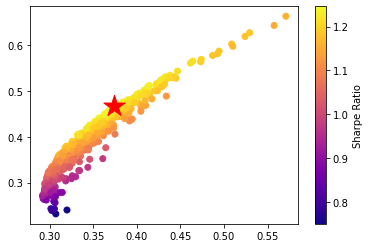

<Figure size 432x288 with 0 Axes>

In [1]:
#Performs a Monte Carlo Simulation to create 500 randomly weighted portfolios
#Calculates and plots the mean of their returns against their risk/volatility (as measured from 2018 to present)
#Indicates their Sharpe Ratio by colour and specifies the optimal portfolio (which maximizes return while minimizing risk)

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

plt.savefig('plot.png')